## CT255 - Buổi 2 : Bài toán hồi quy 
### Đỗ Khánh Toàn B2012046




### 1. Bài toán hồi quy là gì? Các ứng dụng của nó. Có bao nhiêu độ đo trong bài toán hồi quy, Trình bày các công thức tính các độ đo, chú thích rõ các thành phần trong công thức.
 


-	Hồi quy là một kỹ thuật học máy thường được sử dụng để thu được các đầu ra liên tục thay vì các đầu ra rời rạc trong phân loại.
-	Nhiệm vụ hồi quy đã được giới thiệu trong Phần 3.5.1. Cho y ∈ R, x ∈ Rl là hai thực thể ngẫu nhiên phụ thuộc thống kê. Cho trước một tập mẫu huấn luyện (yi, xi), mục tiêu là tính toán một hàm g(x) để ước tính giá trị của y một cách tối ưu khi đo được x. Trong một số trường hợp, loại chi phí bình phương trung bình hoặc bình phương nhỏ nhất không phải là loại chi phí phù hợp nhất
-	Dùng để tính toán để ước tính giá trị một cách tối ưu.
- Ứng dụng : 
    - Mô hình Hồi quy tuyến tính (Linear Regression Model)
    - Hàm mất mát (Loss Function)
    - Thuật toán tối ưu Loss Function (Optimization Algorithms)
- Độ đo trong bài toán hồi quy: 
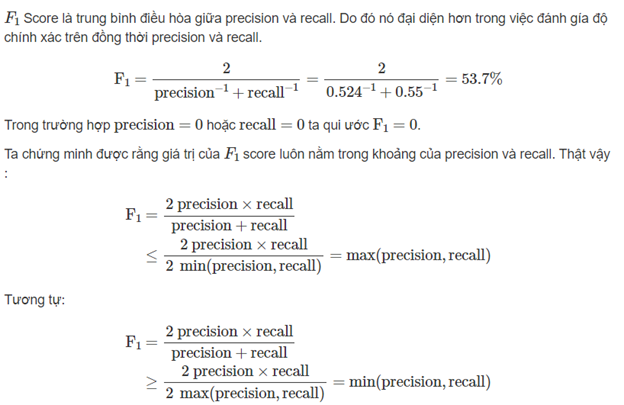
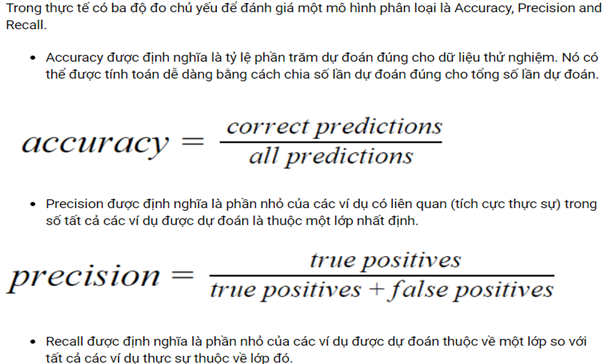
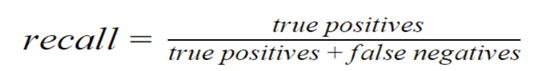
- MSE : tính trung bình của bình phương sai số giữa giá trị thực tế và giá trị dự đoán Coi giá trị thực tế của nhà thứ i là yi, còn giá trị dự đoán của căn nhà đó là yi’.
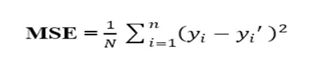
- MAE: MAE (Mean Absolute Error) là 1 metric đánh giá mô hình bằng cách tính trung bình giá trị tuyệt đối sai số giữa giá trị thực tế và giá trị dự đoán.
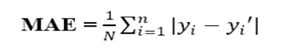
- MRR: Mean Reciprocal Rank (MRR) là một trong những metrics đơn giản nhất trong việc đánh giá các ranking models. MRR tính trung bình của các thức hạng tương ứng của mục liên quan đầu tiên đối với tập các truy vấn Q
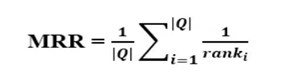
Link tham khảo: https://rabiloo.com/vi/blog/cac-phuong-phap-danh-gia-mo-hinh-machine-learning-va-deep-learning



### 2. Trình bày các cách chia dữ liệu để huấn luyện và đánh giá một mô hình máy học. Phân tích mỗi cách chia chúng ta nên dùng trong các trường hợp nào cho hợp lý.



Cách chia dữ liệu : tạo ra một tập dữ liệu con - được biết đến là tập dữ liệu đánh giá. Một tập dữ liệu điển hình sẽ có tỷ lệ 60% cho tập huấn luyện, 20% cho tập đánh giá và 20% cho tập thử nghiệm.
Một điều rất quan trọng là độ hỗn loạn của tập dữ liệu có thể được tăng lên đáng kể khi bạn xáo trộn dữ liệu trước khi chia tập dữ liệu ra thành nhiều phần nhỏ. Điều này giúp cho mỗi tập dữ liệu con có thể thể hiện rõ ràng hơn tính chất của tập dữ liệu lớn. 
Đánh giá mô hình máy học: 
-	Đánh giá mô hình thông qua những thước đo đánh giá mô hình
-	Chia ra làm 3 bài toán
- Bài toán phân loại: 
    - sư dụng công thức Accuracy, Precision, recall, F1-score, AUC
    
    
    - Bài toán hồi quy: MSE, MAE
    
    
    - Bài toán xếp hạng: MRR, Precision at k, DCG-NDCG


#### 3. Thực hiện lại các hướng dẫn từ trang 69 đến 76 để hiểu rõ cách cài đặt thực nghiệm bài toán hồi quy với các giải thuật khác nhau.

In [63]:
import pandas as pd
from sklearn import datasets
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data,columns = boston.feature_names)
bos['PRICE'] = boston.target
bos.head()

/home/toandokhanh/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [4]:
from sklearn.datasets import load_boston
X,y = load_boston(return_X_y = True)
print(X.shape)

(506, 13)


/home/toandokhanh/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [5]:
import pandas as pd
df =pd.read_csv(r'Customers.csv')

In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
#random_state=1 đảm bảo lập lại kế quả để kiểm định
print('Sample train')
print(X_train.shape)
print('Sample test')
print(X_test.shape)

Sample train
(404, 13)
Sample test
(102, 13)


### HỒI QUY TUYẾN TÍNH

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train) # huẩn luyện model

LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_train_pred = regr.predict(X_train)
print('Train: mean squared error = ',mean_squared_error(y_train,y_train_pred))
print('Train: Mean absolute error = ',mean_absolute_error(y_train, y_train_pred))

y_test_pred = regr.predict(X_test)
print('Test: mean squared error = ',mean_squared_error(y_test,y_test_pred))
print('Test: Mean absolute error = ',mean_absolute_error(y_test, y_test_pred))

Train: mean squared error =  21.86279471487961
Train: Mean absolute error =  3.196196807325735
Test: mean squared error =  23.380836480270144
Test: Mean absolute error =  3.750712180838911


=> Độ lỗi của tập train thấp hơn tập test (gần bằng nên đáng tin cậy)

### SVM

In [16]:
from sklearn import svm
svm_regr = svm.SVR()
svm_regr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error
y_train_pred = svm_regr.predict(X_train)
print('Train: Mean squared error = ', mean_squared_error(y_train,y_train_pred))
print('Train: Mean absolute error = ',mean_absolute_error(y_train, y_train_pred))

y_test_pred = svm_regr.predict(X_test)
print('Test: Mean squared error = ', mean_squared_error(y_test,y_test_pred))
print('Test: Mean absolute error = ',mean_absolute_error(y_test, y_test_pred))

Train: Mean squared error =  63.110980896358605
Train: Mean absolute error =  5.22581845195294
Test: Mean squared error =  80.88313574924172
Test: Mean absolute error =  5.521848058473931


=> Độ lỗi của tập train thấp hơn tập test

### K láng giềng

In [18]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error
y_train_pred = neigh.predict(X_train)
print('Train: mean squared error = ',mean_squared_error(y_train,y_train_pred))
print('Train: Mean absolute error = ',mean_absolute_error(y_train, y_train_pred))

y_test_pred = regr.predict(X_test)
print('Test: mean squared error = ',mean_squared_error(y_test,y_test_pred))
print('Test: Mean absolute error = ',mean_absolute_error(y_test, y_test_pred))

Train: mean squared error =  12.452419554455446
Train: Mean absolute error =  2.294678217821782
Test: mean squared error =  23.380836480270144
Test: Mean absolute error =  3.750712180838911


### Cây quyết định

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(random_state=0)
dt_regr.fit (X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error
y_train_pred = dt_regr.predict(X_train)
print('Train: mean squared error = ',mean_squared_error(y_train,y_train_pred))
print('Train: Mean absolute error = ',mean_absolute_error(y_train, y_train_pred))

y_test_pred = dt_regr.predict(X_test)
print('Train: mean squared error = ',mean_squared_error(y_test,y_test_pred))
print('Train: Mean absolute error = ',mean_absolute_error(y_test, y_test_pred))

Train: mean squared error =  0.0
Train: Mean absolute error =  0.0
Train: mean squared error =  18.56470588235294
Train: Mean absolute error =  3.015686274509803


### Rừng ngẫu nhiên

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(random_state=0)
rf_regr.fit (X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error
y_train_pred = rf_regr.predict(X_train)
print('Train: mean squared error = ',mean_squared_error(y_train,y_train_pred))
print('Train: Mean absolute error = ',mean_absolute_error(y_train, y_train_pred))

y_test_pred = rf_regr.predict(X_test)
print('Train: mean squared error = ',mean_squared_error(y_test,y_test_pred))
print('Train: Mean absolute error = ',mean_absolute_error(y_test, y_test_pred))

Train: mean squared error =  1.3774225569306913
Train: Mean absolute error =  0.8042004950495042
Train: mean squared error =  8.95961084313726
Train: Mean absolute error =  2.3106666666666675


### Mạng nơ-ron (CNN-1D)

In [24]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten

model= Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)))

model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

X_train_reshape = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshape= X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_train_reshape.shape)
model.fit(X_train_reshape, y_train, batch_size=32,epochs=500,verbose=0)
# batch_size dựa trên bộ nhớ máy tính
# 
y_train_pred = model.predict(X_train_reshape)
print('Train: mean squared error = ',mean_squared_error(y_train,y_train_pred))
print('Train: Mean absolute error = ',mean_absolute_error(y_train, y_train_pred))

y_test_pred = model.predict(X_test_reshape)
print('Test: mean squared error = ',mean_squared_error(y_test,y_test_pred))
print('Test: Mean absolute error = ',mean_absolute_error(y_test, y_test_pred))

(404, 13, 1)
13/13 [==============================] - 0s 831us/step
Train: mean squared error =  15.431150580808387
Train: Mean absolute error =  2.654819566896646
4/4 [==============================] - 0s 1ms/step
Test: mean squared error =  16.281405453265634
Test: Mean absolute error =  2.9221453217899103


#### 4. Dựa vào mô tả trong giáo trình trang 68, các bạn hãy load dữ liệu của 7 bộ này, và thể hiện thông tin số chiều của mỗi bộ, ví dụ:

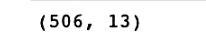

#### + boston house-prices

In [46]:
import pandas as pd
from sklearn import datasets
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data,columns = boston.feature_names)
bos['PRICE'] = boston.target
bos.head()


/home/toandokhanh/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [47]:
from sklearn.datasets import load_boston
X,y = load_boston(return_X_y = True)
print(X.shape)

(506, 13)


/home/toandokhanh/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

#### +IRIS:

In [40]:
import pandas as pd
from sklearn import datasets
boston = datasets.load_iris()
bos = pd.DataFrame(boston.data,columns = boston.feature_names)
bos['PRICE'] = boston.target
bos.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   PRICE  
0      0  
1      0  
2      0  
3      0  
4      0

In [41]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y = True)
print(X.shape)

(150, 4)


#### + Diabetes:

In [42]:
import pandas as pd
from sklearn import datasets
boston = datasets.load_diabetes()
bos = pd.DataFrame(boston.data,columns = boston.feature_names)
bos['PRICE'] = boston.target
bos.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  PRICE  
0 -0.002592  0.019907 -0.017646  151.0  
1 -0.039493 -0.068332 -0.092204   75.0  
2 -0.002592  0.002861 -0.025930  141.0  
3  0.034309  0.022688 -0.009362  206.0  
4 -0.002592 -0.031988 -0.046641  135.0

In [43]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y = True)
print(X.shape)

(442, 10)


#### + digits:

In [44]:
import pandas as pd
from sklearn import datasets
boston = datasets.load_digits()
bos = pd.DataFrame(boston.data,columns = boston.feature_names)
bos['PRICE'] = boston.target
bos.head()

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
3        0.0        0.0        0.0        8.0  ...        0.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0        0.0        6.0       13.0       10.0        0.0        0.0   
1        0.0        0.0       11.0       16.0       10.0        0.0   
2        0.0        0.0        3.0       11.0       16.0        9.0   
3        0.0        7.0       13.0       13.0        9.0        0.0   
4        0.0        0.0        2.0       16.0        4.0        0.0   

   pixel_7_7  PRICE  
0        0.0      0  
1        0.0      1  
2        0.0      2  
3        0.0      3  
4        0.0      4  

[5 rows x 65 columns]

In [45]:
from sklearn.datasets import load_digits
X,y = load_digits(return_X_y = True)
print(X.shape)

(1797, 64)


#### + Physical exercise linnerud:

In [56]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()
linnerud_data = linnerud.data
feature_names = linnerud.feature_names
target_names = linnerud.target_names
target = linnerud.target
df = pd.DataFrame(linnerud_data, columns=feature_names)
df['WEIGHT'] = target[:, 0] 
df['WAIST'] = target[:, 1]
print(df.head())



   Chins  Situps  Jumps  WEIGHT  WAIST
0    5.0   162.0   60.0   191.0   36.0
1    2.0   110.0   60.0   189.0   37.0
2   12.0   101.0  101.0   193.0   38.0
3   12.0   105.0   37.0   162.0   35.0
4   13.0   155.0   58.0   189.0   35.0


In [57]:
print(df.shape)

(20, 5)


#### +Wine:

In [48]:
import pandas as pd
from sklearn import datasets
boston = datasets.load_wine()
bos = pd.DataFrame(boston.data,columns = boston.feature_names)
bos['PRICE'] = boston.target
bos.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  PRICE  
0                          3.92   1065.0      0  
1                          3.40   1050.0      0  
2                          3.17   1185.0      0  
3                          3.45   1480.0      0  
4                          2.93    735.0      0

In [49]:
from sklearn.datasets import load_wine
X,y = load_wine(return_X_y = True)
print(X.shape)

(178, 13)


#### + breast cancer Wisconsin

In [50]:
import pandas as pd
from sklearn import datasets
boston = datasets.load_breast_cancer()
bos = pd.DataFrame(boston.data,columns = boston.feature_names)
bos['PRICE'] = boston.target
bos.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  PRICE  
0          0.4601                  0.11890      0  
1          0.2750                  0.08902      0  
2          0.3613                  0.08758      0  
3          0.6638                  0.17300      0  
4          0.2364                  0.07678      0  

[5 rows x 31 columns]

In [51]:
from sklearn.datasets import load_breast_cancer
X,y = load_breast_cancer(return_X_y = True)
print(X.shape)

(569, 30)


#### 5. Tạo 1 cell để download file customers.csv, load dữ liệu từ file này, dùng lệnh head và hiển thị thông tin số chiều của bộ dữ liệu.
